<a href="https://colab.research.google.com/github/TelezaKanthonga/C-basics/blob/master/cnnmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#20 epochs
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train and test datasets
train_dir = '/content/drive/MyDrive/Afla_trainDataset'
test_dir = '/content/drive/MyDrive/Afla_testDataset'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 64

# Create data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print('Test accuracy:', test_accuracy)


# Save the trained model
model.save('/content/drive/MyDrive/cnn_trained_model2.h5')


Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/10
54/54 [==============================] - 749s 14s/step - loss: 0.2795 - accuracy: 0.8775 - val_loss: 0.0750 - val_accuracy: 0.9728
Epoch 2/10
54/54 [==============================] - 493s 9s/step - loss: 0.0560 - accuracy: 0.9776 - val_loss: 0.0408 - val_accuracy: 0.9851
Epoch 3/10
54/54 [==============================] - 521s 10s/step - loss: 0.0420 - accuracy: 0.9843 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 4/10
54/54 [==============================] - 509s 9s/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0368 - val_accuracy: 0.9864
Epoch 5/10
54/54 [==============================] - 508s 9s/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0476 - val_accuracy: 0.9803
Epoch 6/10
54/54 [==============================] - 517s 10s/step - loss: 0.0204 - accuracy: 0.9927 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 7/10
54/54 [==============================] - 516s 10s/step -

Model Evaluation

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/cnn_trained_model2.h5')

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the path to the test dataset directory
test_dir = '/content/drive/MyDrive/Afla_testDataset'

img_width, img_height = 224, 224
batch_size=64

# Create a new test generator for evaluation
evaluation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Generate predictions for the test dataset
y_pred = loaded_model.predict(evaluation_generator)
y_pred_classes = np.round(y_pred)

# Extract the true class labels
y_true = evaluation_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Calculate evaluation metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)


Found 1500 images belonging to 2 classes.
24/24 [==============================] - 581s 25s/step
Confusion Matrix:
[[727   5]
 [ 10 758]]
Accuracy: 0.99
Precision: 0.9934469200524246
Recall: 0.9869791666666666
F1-Score: 0.9902024820378837


 ROC curve and calculate the AUC using the predicted probabilities from the model

24/24 [==============================] - 55s 2s/step


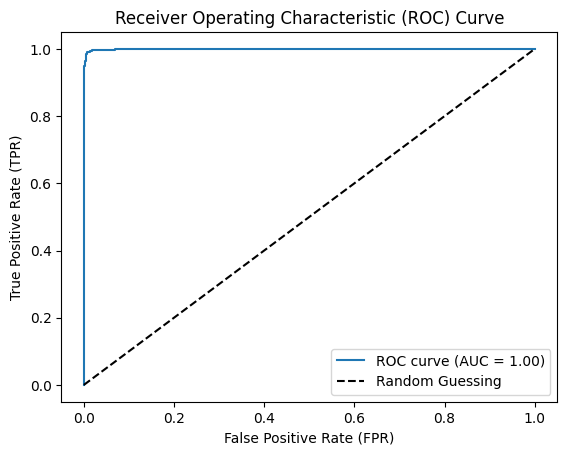

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for the test dataset
y_pred_prob = loaded_model.predict(evaluation_generator)

# Extract the true class labels
y_true = evaluation_generator.classes

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


confusion matrix heat map

24/24 [==============================] - 57s 2s/step


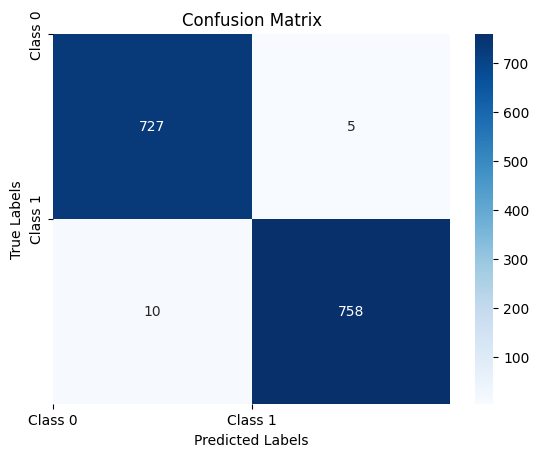

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for the test dataset
y_pred_prob = loaded_model.predict(evaluation_generator)
y_pred_classes = np.round(y_pred_prob)

# Extract the true class labels
y_true = evaluation_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Show the plot
plt.show()


 a Loss vs. Epochs curve using the history object:

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/10
54/54 [==============================] - 1265s 23s/step - loss: 0.2900 - accuracy: 0.8952 - val_loss: 0.1271 - val_accuracy: 0.9606
Epoch 2/10
54/54 [==============================] - 500s 9s/step - loss: 0.0786 - accuracy: 0.9724 - val_loss: 0.0703 - val_accuracy: 0.9789
Epoch 3/10
54/54 [==============================] - 493s 9s/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0333 - val_accuracy: 0.9864
Epoch 4/10
54/54 [==============================] - 494s 9s/step - loss: 0.0359 - accuracy: 0.9878 - val_loss: 0.0389 - val_accuracy: 0.9837
Epoch 5/10
54/54 [==============================] - 493s 9s/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0615 - val_accuracy: 0.9803
Epoch 6/10
54/54 [==============================] - 492s 9s/step - loss: 0.0365 - accuracy: 0.9852 - val_loss: 0.0470 - val_accuracy: 0.9817
Epoch 7/10
54/54 [==============================] - 492s 9s/step - l

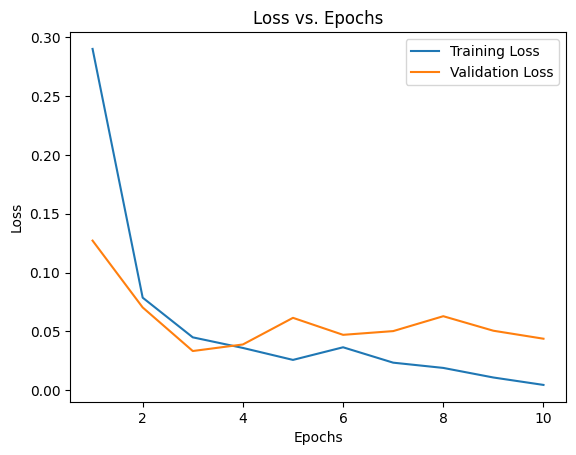

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the paths to your train and test datasets
train_dir = '/content/drive/MyDrive/Afla_trainDataset'
test_dir = '/content/drive/MyDrive/Afla_testDataset'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 64

# Create data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and obtain the history object
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Extract the loss values and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epoch numbers
epochs_range = range(1, epochs + 1)

# Plot the Loss vs. Epochs curve
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()
